In [60]:
!kaggle datasets download -d mohansacharya/graduate-admissions -p "/Users/vishnumr/My Files/Programs/Python/Deep Learning 100/data"

Dataset URL: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
License(s): CC0-1.0
graduate-admissions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [61]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('data/Admission_Predict_Ver1.1.csv')

In [63]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [64]:
df.shape

(500, 9)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [66]:
df.duplicated().sum()

np.int64(0)

In [67]:
df.drop(columns=['Serial No.'], inplace=True)

In [68]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [69]:
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=1)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
X_train_scaled

array([[0.61904762, 0.625     , 1.        , 0.875     , 0.66666667,
        0.71535581, 1.        ],
       [0.38095238, 0.41666667, 0.5       , 0.5       , 1.        ,
        0.61797753, 0.        ],
       [0.0952381 , 0.125     , 0.        , 0.25      , 0.        ,
        0.        , 0.        ],
       [0.64285714, 0.75      , 0.5       , 0.625     , 0.33333333,
        0.67041199, 1.        ],
       [0.14285714, 0.29166667, 1.        , 1.        , 0.33333333,
        0.25093633, 0.        ],
       [0.45238095, 0.45833333, 0.25      , 0.625     , 0.33333333,
        0.38576779, 0.        ],
       [0.02380952, 0.16666667, 0.        , 0.125     , 0.        ,
        0.23970037, 0.        ],
       [1.        , 1.        , 0.75      , 0.875     , 0.66666667,
        1.        , 1.        ],
       [0.26190476, 0.625     , 0.25      , 0.375     , 0.66666667,
        0.29213483, 0.        ],
       [0.33333333, 0.375     , 0.25      , 0.25      , 0.16666667,
        0.4494382 , 0. 

In [73]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [74]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))  # Using linear function for Regression based problems 

/Users/vishnumr/My Files/Programs/Python/Deep Learning 100/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

In [77]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.0000e+00 - loss: 0.5439 - val_accuracy: 0.0000e+00 - val_loss: 0.6418
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 0.5107 - val_accuracy: 0.0000e+00 - val_loss: 0.6201
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 0.4980 - val_accuracy: 0.0000e+00 - val_loss: 0.5991
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 0.4660 - val_accuracy: 0.0000e+00 - val_loss: 0.5781
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0000e+00 - loss: 0.4557 - val_accuracy: 0.0000e+00 - val_loss: 0.5568
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 0.4362 - val_accuracy: 0.0000e+00 - val_loss: 0.5351
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 0.4252 - val_accuracy: 0.0000e+00 - val_loss: 0.5129
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 

In [78]:
y_pred = model.predict(X_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [79]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5165585417362377

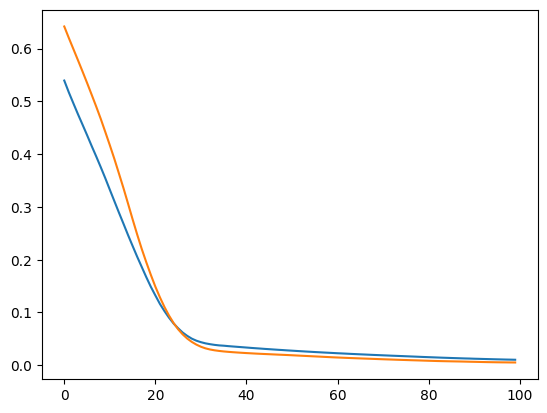

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])